n20


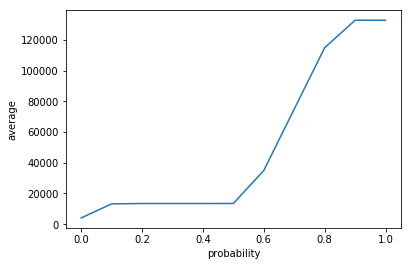

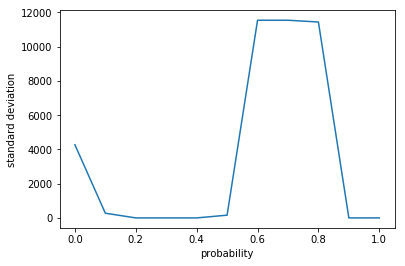

In [6]:
# True False가 들어간 2차원 배열에서 군집을 만들어 True의 개수가 제일 큰 군집을 출력하라.
# 그래프도 그려라 2차원 배열크기 : 최저 20 by 20, 샘플수 : 최소100개 
# 평균과 표준편차도 그려보라. 확률을 0부터 1까지 0.1씩 증가시키면서 HOMEWORK #0 

import numpy as np
import random
import sys
import math
from collections import Counter
import matplotlib.pyplot as plt
sys.setrecursionlimit(999999999)

n = int(input("n"))
list1 = np.full((n,n),'F')

cnt=0

size = []
plist = []
avlist = []
sdlist = []

addRow = np.array((-1,0,1,0))
addCol = np.array((0,1,0,-1))


def dfs(row,col,key):
    list1[row][col] = int(key)
    
    for i in range(4):
        nextRow = row + addRow[i]
        nextCol = col + addCol[i]
        if(nextRow<0 or nextRow >n-1 or nextCol<0 or nextCol>n-1): # 상하좌우를 판별할 때 행렬밖에있으면 for문의 첫번째로 분기
            continue
        if list1[nextRow][nextCol] == 'F':
            nextRow = row
            nextCol = col
            continue
        if list1[nextRow][nextCol] == 'T':
            dfs(nextRow,nextCol,int(key))
    

def execution():
    global cnt
    for i in range(n):
        for j in range(n):
            if(random.random()<0.5):
                list1[i][j] = 'T'
    
    for i in range(n):
        for j in range(n):
            if list1[i][j] =='T':
                cnt+=1
                dfs(i,j,cnt+1)
    

    for i in range(n):
        for j in range(n):
            if list1[i][j] != 'F':
                if(int(list1[i][j])>1):
                    size.append(list1[i][j])
    res = Counter(size).values()
    return max(res)

def execution_sampling(num_samp):
    sum = 0
    sum2 = 0
    for _ in range(num_samp):
        val = execution()
        sum += val
        sum2 += val*val
    avg = sum/num_samp
    avg2 = sum2/num_samp    
    return avg, math.sqrt(avg2-avg*avg)
    

def prob_setting():
    prob=0
    while prob<=1:
        plist.append(prob)
        prob+=0.1
    for prob in plist:
        val1, val2 = execution_sampling(100)
        avlist.append(val1)
        sdlist.append(val2)

def draw_graph():
    plt.plot(plist,avlist)
    plt.ylabel('average')
    plt.xlabel('probability')
    plt.show()

    plt.plot(plist,sdlist)
    plt.ylabel('standard deviation')
    plt.xlabel('probability')
    plt.show()

prob_setting()
draw_graph()


